In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
df = pd.read_csv('2012-18_playerBoxScore_diff.csv')

In [2]:
df.describe(include='all')

,Unnamed: 0,playDispNm,next_gmDays,pre_gmDays,teamDayOff,gmDay,gmDayofweek,gmDayofyear,gmElapsed,teamConfIsEast,...,playBIs_month_start_diff,playBIs_quarter_end_diff,playBIs_quarter_start_diff,playBIs_year_end_diff,playBIs_year_start_diff,playBElapsed_diff,IsStarter_diff,age_diff,Seats_diff,Year_Open_diff
count,154014.000000,154014,154014.000000,154014.000000,154014.000000,154014.000000,154014.000000,154014.000000,1.540140e+05,154014.000000,...,154014.0,154014.000000,154014.0,154014.0,154014.0,1.540140e+05,154014.000000,154014.000000,154014.000000,154014.000000
unique,NaN,895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Corey Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,77006.500000,NaN,2.349851,2.390562,2.076396,15.288493,3.008726,165.169192,1.437743e+09,0.496254,...,0.0,0.000006,0.0,0.0,0.0,5.334435e+03,0.000299,0.016921,-0.065371,-0.006181
std,44460.156517,NaN,1.277117,1.296341,1.049777,9.004586,1.951334,139.444160,5.352373e+07,0.499988,...,0.0,0.004413,0.0,0.0,0.0,3.285570e+06,0.277290,5.648814,1043.351441,11.388362
min,0.000000,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.351728e+09,0.000000,...,0.0,-1.000000,0.0,0.0,0.0,-4.782240e+08,-1.000000,-22.000000,-4050.000000,-52.000000
25%,38503.250000,NaN,2.000000,2.000000,2.000000,7.000000,1.000000,42.000000,1.390522e+09,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.000000,-4.000000,-10.000000,0.000000
50%,77006.500000,NaN,2.000000,2.000000,2.000000,15.000000,3.000000,88.000000,1.446163e+09,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,115509.750000,NaN,3.000000,3.000000,2.000000,23.000000,5.000000,324.000000,1.484525e+09,1.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.000000,4.000000,0.000000,0.000000


In [3]:
df.drop(columns='Unnamed: 0', inplace=True)

In [4]:
target = 'playMin_diff'

In [5]:
feature_names = df.drop([target,'playDispNm'], axis=1)
feature_names = list(feature_names.columns)

In [6]:
X = np.array(df.drop([target,'playDispNm'], axis=1))
y = np.array(df[target])

## 1 Feature importances

In [7]:
from sklearn.model_selection import train_test_split

X_train, X, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [8]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 40, max_features='log2', min_samples_leaf=8).fit(X_train, y_train)

In [9]:
rfr.score(X_val, y_val)

0.6120022811074096

In [10]:
importance_numbers = rfr.feature_importances_

In [11]:
importance_list = importance_numbers.tolist()

In [12]:
importances = np.vstack((feature_names, importance_list))

In [13]:
importances = pd.Series(importance_list, index = feature_names)

In [14]:
importances.sort_values(ascending=False)

playFGA_diff                0.146027
play2PA_diff                0.106806
playPTS_diff                0.077834
playDRB_diff                0.064814
playTRB_diff                0.059262
                              ...   
playBMonth_diff             0.000000
playBDay_diff               0.000000
teamLocIsHome               0.000000
opptLocIsHome               0.000000
playBIs_quarter_end_diff    0.000000
Length: 84, dtype: float64

In [15]:
importances = ['playFGA_diff','playPTS_diff','playTRB_diff','play2PA_diff','playDRB_diff']

In [16]:
df_X_train = pd.DataFrame(X_train, columns=feature_names)
X_val = pd.DataFrame(X_val, columns=feature_names)

In [17]:
df_y_train = pd.DataFrame(y_train, columns=[target])

In [18]:
y_importances_train = df_y_train

In [19]:
y_importances_train = df_y_train

In [20]:
X_importances_train = df_X_train[importances]

In [21]:
X_val_importances = X_val[importances]

In [22]:
X_importances_train.shape

(98568, 5)

In [23]:
X_val_importances.shape

(24643, 5)

In [24]:
rfr_importances = RandomForestRegressor(n_estimators = 40, max_features='log2', min_samples_leaf=8).fit(X_importances_train, y_importances_train)

/Users/jz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [25]:
rfr_importances.score(X_val_importances, y_val)

0.49849627247545475

### An alternative mechanism

In [26]:
import eli5
from eli5.sklearn import PermutationImportance

In [27]:
%%time
perm = PermutationImportance(rfr).fit(X_val, y_val)

CPU times: user 1min 10s, sys: 205 ms, total: 1min 10s
Wall time: 1min 11s


In [28]:
eli5.explain_weights_df(perm, feature_names=feature_names).head(10)

,feature,weight,std
0,playFGA_diff,0.116182,0.001890
1,play2PA_diff,0.058689,0.000381
2,playDRB_diff,0.056735,0.000424
3,playTRB_diff,0.054182,0.001157
4,playAST_diff,0.052594,0.000550
5,playPTS_diff,0.047736,0.000542
6,playPF_diff,0.030801,0.000686
7,play3PA_diff,0.029762,0.000589
8,playFGM_diff,0.027604,0.000416
9,IsStarter_diff,0.025747,0.000339


In [29]:
from sklearn.feature_selection import SelectFromModel
first_selection = SelectFromModel(perm, threshold=0.01, prefit=True)
X_val_first_select = first_selection.transform(X_val)
X_train_first_select = first_selection.transform(X_train)

In [30]:
rfr_first_select = RandomForestRegressor(n_estimators=40, max_features='log2')
rfr_first_select.fit(X_train_first_select, y_train)
rfr_first_select.score(X_val_first_select, y_val)

0.7976710221027197

In [31]:
first_selection.get_support()[:20]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [32]:
first_select_cols = df_X_train.columns[first_selection.get_support()]
first_select_cols[:5]

Index(['playPTS_diff', 'playAST_diff', 'playTO_diff', 'playSTL_diff',
       'playBLK_diff'],
      dtype='object')

In [33]:
first_select_cols.shape

(22,)

In [34]:
from eli5.sklearn import PermutationImportance
second_pmi = PermutationImportance(rfr_first_select).fit(X_val_first_select, y_val)

In [35]:
eli5.explain_weights_df(second_pmi, top=5, feature_names = first_select_cols.to_list())

,feature,weight,std
0,playFGA_diff,0.274487,0.002277
1,playTRB_diff,0.132427,0.001218
2,playAST_diff,0.130119,0.001541
3,playPTS_diff,0.124482,0.001185
4,playDRB_diff,0.111316,0.000767


In [36]:
eli5.explain_weights_df(second_pmi, feature_names = first_select_cols.to_list()).tail(5)

,feature,weight,std
17,playBLK_diff,0.030575,0.000610
18,play2PM_diff,0.028644,0.000367
19,play3P%_diff,0.024534,0.000275
20,playORB_diff,0.022422,0.000135
21,play3PM_diff,0.016965,0.000095


In [37]:
second_select = SelectFromModel(second_pmi, threshold=0.01, prefit=True)
X_train_second_select = second_select.transform(X_train_first_select)
X_val_second_select = second_select.transform(X_val_first_select)

rfr_second_select = RandomForestRegressor(n_estimators=40, max_features='log2')
rfr_second_select.fit(X_train_second_select, y_train)
rfr_second_select.score(X_val_second_select, y_val)

0.7959382801110338

In [38]:
third_pmi = PermutationImportance(rfr_second_select).fit(X_val_second_select, y_val)
third_select = SelectFromModel(third_pmi, threshold=0.01, prefit=True)

X_train_third_select = third_select.transform(X_train_second_select)
X_val_third_select = third_select.transform(X_val_second_select)

rfr = RandomForestRegressor(n_estimators=40, max_features='log2')
rfr.fit(X_train_third_select, y_train)
rfr.score(X_val_third_select, y_val)

0.7973842434235148

In [39]:
second_select_cols = first_select_cols[second_select.get_support()]
third_select_cols = second_select_cols[third_select.get_support()]
third_select_cols.shape

(22,)

In [40]:
eli5.explain_weights_df(third_pmi, feature_names = second_select_cols.to_list())[:13]

,feature,weight,std
0,playFGA_diff,0.272546,0.000658
1,playTRB_diff,0.135097,0.001143
2,playAST_diff,0.130124,0.001842
3,playPTS_diff,0.125474,0.000991
4,playDRB_diff,0.110500,0.001219
5,playPF_diff,0.083386,0.000914
6,play2PA_diff,0.074712,0.000711
7,playFG%_diff,0.062211,0.000563
8,play3PA_diff,0.060082,0.000607
9,playFTA_diff,0.054403,0.000105


In [41]:
selected_X_train = pd.DataFrame(X_train_third_select, columns=third_select_cols)
selected_X_val = pd.DataFrame(X_val_third_select, columns=third_select_cols)

## 2 Correlation Analysis

In [42]:
rfr = RandomForestRegressor(n_estimators=40, max_features='log2')
rfr.fit(selected_X_train, y_train)
rfr.score(selected_X_val, y_val)

0.7976949837411423

In [43]:
import numpy as np
indexed_corr = (np.abs(selected_X_train.corr(method = 'spearman')) > .60).sum()
correlated_cols = indexed_corr[indexed_corr > 1].index
correlated_cols

Index(['playPTS_diff', 'playFGA_diff', 'playFGM_diff', 'play2PA_diff',
       'play2PM_diff', 'play3PA_diff', 'play3PM_diff', 'playFTA_diff',
       'playFTM_diff', 'playDRB_diff', 'playTRB_diff', 'playFG%_diff',
       'play2P%_diff', 'play3P%_diff', 'playFT%_diff'],
      dtype='object')

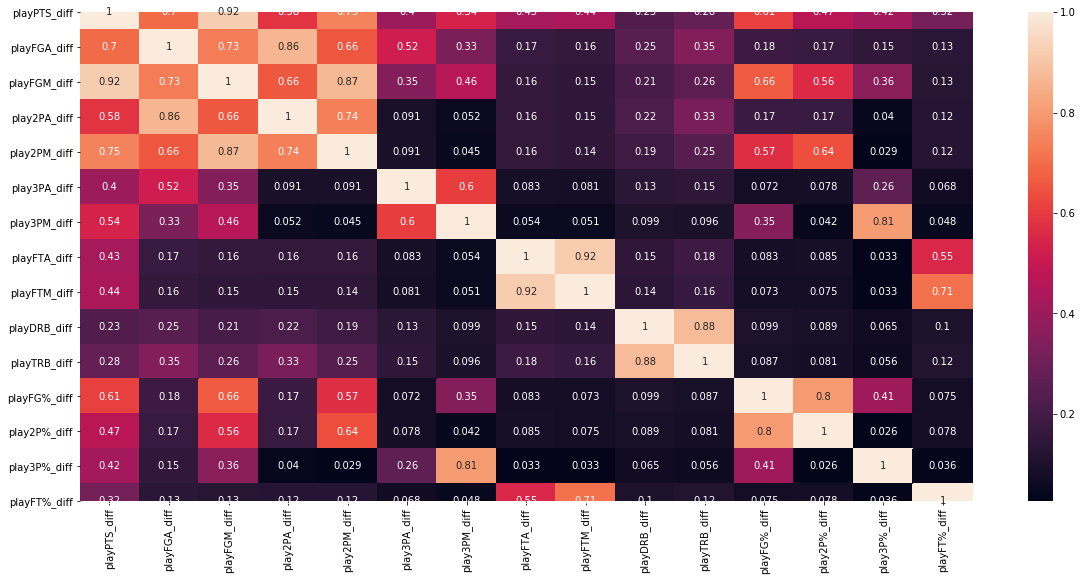

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 9))
df_corr = selected_X_train[correlated_cols].corr(method = 'spearman')
sns.heatmap(df_corr, annot = True)


From here we can identify those features that are highly correlated. The lighter the color, the higher the correlation.

1. playPTS_diff, playFGM_diff 0.92
2. playFTA_diff, playFTM_diff 0.92
3. playDRB_diff, playTRB_diff 0.88
4. playFGM_diff, play2PM_diff 0.87
5. play2PA_diff, playFGA_diff 0.86

If we try various permutations of removing one or more of our availability features, to see if we suffer a significant from from our original score of 0.796

In [45]:
df_dropped_avail_train = selected_X_train.drop(columns = ['playFGM_diff','playPTS_diff'])
df_dropped_avail_val = selected_X_val.drop(columns = ['playFGM_diff','playPTS_diff'])

rfr_dropped_avail = RandomForestRegressor(n_estimators=40, max_features='log2')
rfr_dropped_avail.fit(df_dropped_avail_train, y_train)
rfr_dropped_avail.score(df_dropped_avail_val, y_val)

0.7983318185724223

In [46]:
df_dropped_avail_train = selected_X_train.drop(columns = ['playDRB_diff','play2PA_diff','playFGM_diff','playPTS_diff','playFTA_diff','playFTM_diff'])
df_dropped_avail_val = selected_X_val.drop(columns = ['playDRB_diff','play2PA_diff','playFGM_diff','playPTS_diff','playFTA_diff','playFTM_diff'])

rfr_dropped_avail = RandomForestRegressor(n_estimators=40, max_features='log2')
rfr_dropped_avail.fit(df_dropped_avail_train, y_train)
rfr_dropped_avail.score(df_dropped_avail_val, y_val)

0.7944287868800375

In [47]:
selected_X_train = selected_X_train.drop(columns = ['playDRB_diff','play2PA_diff','playFGM_diff','playPTS_diff','playFTA_diff','playFTM_diff'])
selected_X_val = selected_X_val.drop(columns = ['playDRB_diff','play2PA_diff','playFGM_diff','playPTS_diff','playFTA_diff','playFTM_diff'])

### Working with Dendrograms

CPU times: user 1.57 s, sys: 9.27 ms, total: 1.58 s
Wall time: 1.59 s


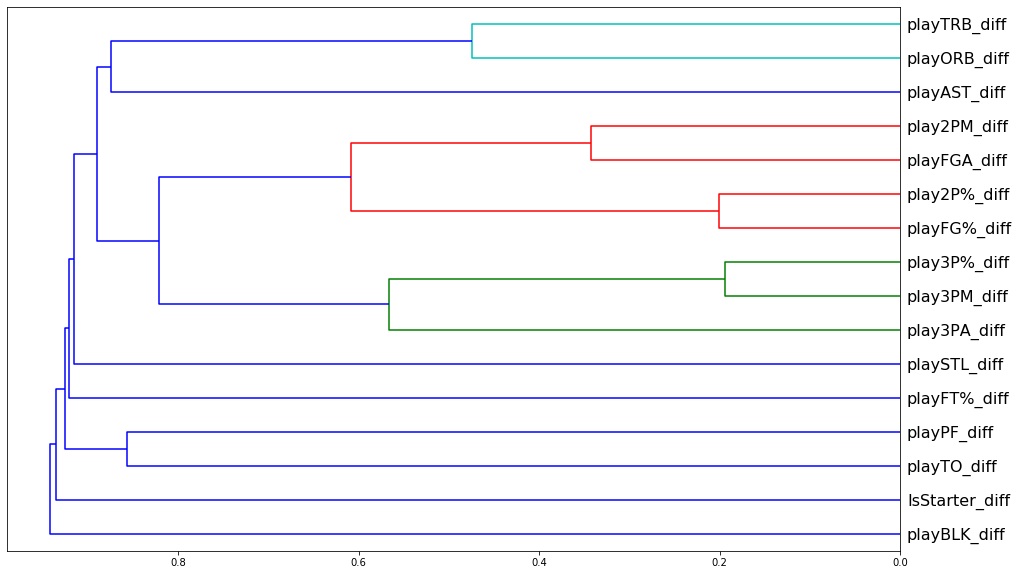

In [48]:
%%time
import scipy.cluster.hierarchy as hc
corr = selected_X_train.corr(method = 'spearman')
corr_condensed = hc.distance.squareform(1 - np.abs(corr))
z = hc.linkage(corr_condensed, method = 'average')

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels = list(selected_X_train.columns), orientation = 'left', leaf_font_size=16)

Looking at the dendrogram above, we should either remove play3P%_diff or IsStarter_diff, or next_gmDays_diff.
See how score drop from 0.7957189758201202

In [49]:
df_dropped_avail_train = selected_X_train.drop(columns = ['playPF_diff'])
df_dropped_avail_val = selected_X_val.drop(columns = ['playPF_diff'])

rfr_dropped_avail = RandomForestRegressor(n_estimators=40, max_features='log2')
rfr_dropped_avail.fit(df_dropped_avail_train, y_train)
rfr_dropped_avail.score(df_dropped_avail_val, y_val)

0.7881880050481065

In [50]:
df_dropped_avail_train = selected_X_train.drop(columns = ['playTO_diff'])
df_dropped_avail_val = selected_X_val.drop(columns = ['playTO_diff'])

rfr_dropped_avail = RandomForestRegressor(n_estimators=40, max_features='log2')
rfr_dropped_avail.fit(df_dropped_avail_train, y_train)
rfr_dropped_avail.score(df_dropped_avail_val, y_val)

0.7897829139149445

After several trial, we could drop these columns:
['playTO_diff','playORB_diff','play3PM_diff','play2P%_diff','play2PM_diff']

In [51]:
df_dropped_avail_train = selected_X_train.drop(columns = ['playTO_diff','playORB_diff','play3PM_diff','play2P%_diff','play2PM_diff'])
df_dropped_avail_val = selected_X_val.drop(columns = ['playTO_diff','playORB_diff','play3PM_diff','play2P%_diff','play2PM_diff'])

rfr_dropped_avail = RandomForestRegressor(n_estimators=40, max_features='log2')
rfr_dropped_avail.fit(df_dropped_avail_train, y_train)
rfr_dropped_avail.score(df_dropped_avail_val, y_val)

0.7863533611904798

CPU times: user 779 ms, sys: 5.47 ms, total: 785 ms
Wall time: 783 ms


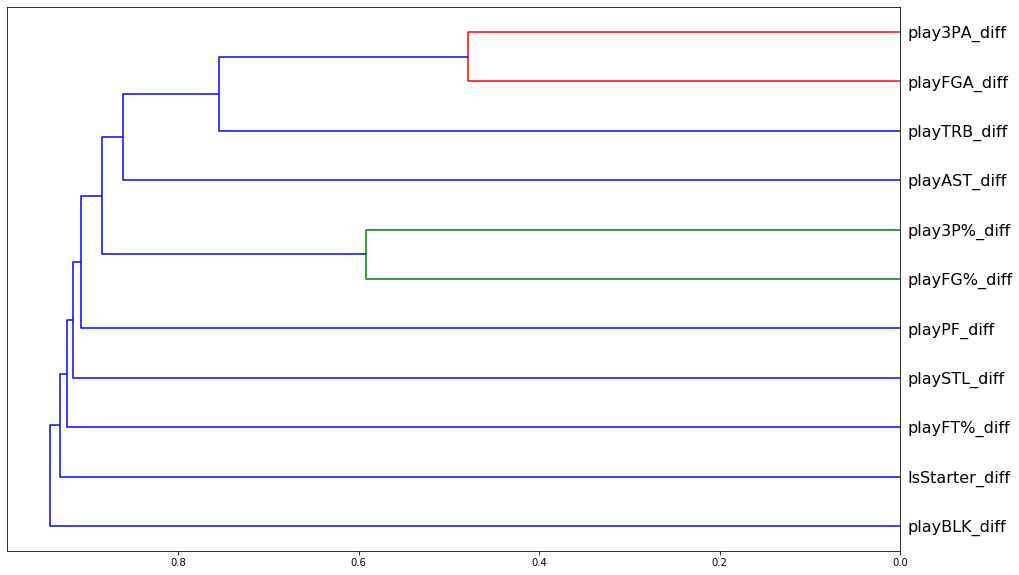

In [52]:
%%time
import scipy.cluster.hierarchy as hc
corr = df_dropped_avail_train.corr(method = 'spearman')
corr_condensed = hc.distance.squareform(1 - np.abs(corr))
z = hc.linkage(corr_condensed, method = 'average')

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels = list(df_dropped_avail_train.columns), orientation = 'left', leaf_font_size=16)

In [53]:
df_dropped_avail_train = selected_X_train.drop(columns = ['play3PA_diff','playTO_diff','playORB_diff','play3PM_diff','play2P%_diff','play2PM_diff'])
df_dropped_avail_val = selected_X_val.drop(columns = ['play3PA_diff','playTO_diff','playORB_diff','play3PM_diff','play2P%_diff','play2PM_diff'])

rfr_dropped_avail = RandomForestRegressor(n_estimators=40, max_features='log2')
rfr_dropped_avail.fit(df_dropped_avail_train, y_train)
rfr_dropped_avail.score(df_dropped_avail_val, y_val)

0.7814190198086001

CPU times: user 845 ms, sys: 19.8 ms, total: 865 ms
Wall time: 903 ms


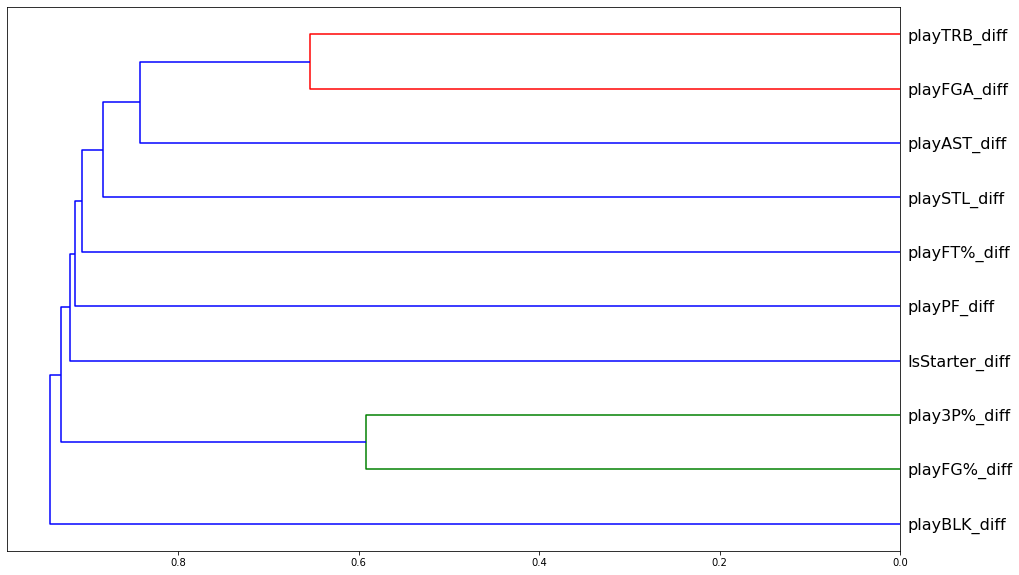

In [54]:
%%time
import scipy.cluster.hierarchy as hc
corr = df_dropped_avail_train.corr(method = 'spearman')
corr_condensed = hc.distance.squareform(1 - np.abs(corr))
z = hc.linkage(corr_condensed, method = 'average')

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels = list(df_dropped_avail_train.columns), orientation = 'left', leaf_font_size=16)

After removing those high correlated features, we could now see the hierarchical clustering through Dendrograms. 

Applying with the knowledge of NBA, we could divide the features that predicts the playmin difference into three groups:

1. playFT%_diff and playFG%_diff: Personal offensive ability for two points
2. playTRB_diff: the actions that work across team or 3 points
3. playBLK_diff: defense

In [58]:
df_dropped_avail_train.loc[:, 'playMin_diff'] = y_train

df_dropped_avail_val.loc[:, 'playMin_diff'] = y_val

df_dropped_avail_train.to_feather('./train_removed_corr.feather')
df_dropped_avail_val.to_feather('./val_removed_corr.feather') 